用线性回归预测波士顿房价

In [13]:
# 导入包
%matplotlib inline
from sklearn.datasets import load_boston
from sklearn.cross_validation import cross_val_predict
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [12]:
# 导入数据
boston = load_boston()
# 了解数据的情况
print(boston.keys())
print(boston.data.shape)
print(boston.target.shape)
print(boston.feature_names)
print(boston.DESCR)

dict_keys(['data', 'target', 'feature_names', 'DESCR'])
(506, 13)
(506,)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD 

In [14]:
# 建模
## lr
lr = LinearRegression()
X = boston.data
y = boston.target
## 使用cross_val_predict，10折交叉验证
y_pred = cross_val_predict(lr, X, y, cv = 10)
## 使用joblib.dump汇出预测器
from sklearn.externals import joblib
joblib.dump(lr, './lr_machine.pkl')
## 将pkl档汇入为一个线性回归预测器lr，然后进行训练
lr = joblib.load('./lr_machine.pkl')
lr.fit(X, y)
predicted_3 = lr.predict(X[2])

d:\application\python\python36\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


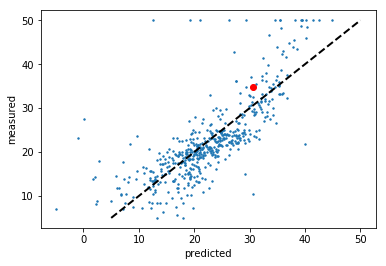

In [18]:
# 绘制预测结果
plt.scatter(y_pred, y, s = 2)
plt.plot(predicted_3, y[2], 'ro')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw = 2)
plt.xlabel('predicted')
plt.ylabel('measured')